In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyecharts import Line,Bar
from itertools import product
%matplotlib inline

### 房间里有n人，每人都有init_fund元，他们在玩一个游戏，每轮游戏每个人都要拿出一块钱随机给到另一人。
### 问 epoch 轮后 这n个人分别对应的现金是多少？ 假设允许负债

In [2]:
def roulette_game(num_players, init_fund, epoch, reward):
    '''
    模拟轮盘游戏
    :param num_players: 参与游戏的玩家数  dtype：int
    :param init_fund: 游戏初始金额    dtype：int,float
    :param epoch: 游戏轮盘次数    dtype：int
    :param reward: 每次轮盘游戏的赢家额外收益    dtype：float
    :return:
            sorted_fund: 游戏结束后排序过的各个玩家资金 dytpe：numpy.array
            sorted_scaler_fund : 游戏结束后排序过且归一到【-1，1】后的各个玩家资金 dtype：numpy.array
    '''
    fund = np.ones(num_players) * init_fund
    ## 一下为轮盘游戏
    for i in range(epoch):
        roulette = np.random.random(num_players)
        roulette_sort_ind = np.argsort(roulette)
        fund[roulette_sort_ind[:int(num_players/2)]] -= 1
        fund[roulette_sort_ind[int(num_players/2):]] += 1 
        fund[roulette_sort_ind[:int(num_players/2)]] += reward
    sorted_fund = sorted(fund)

    ## 将游戏结果 标准化
    std = np.std(fund)
    scaler_fund = (fund - np.mean(fund)) / std 
    sorted_scaler_fund = sorted(scaler_fund)
    return sorted_fund, sorted_scaler_fund
    

## 只改变游戏参与人数

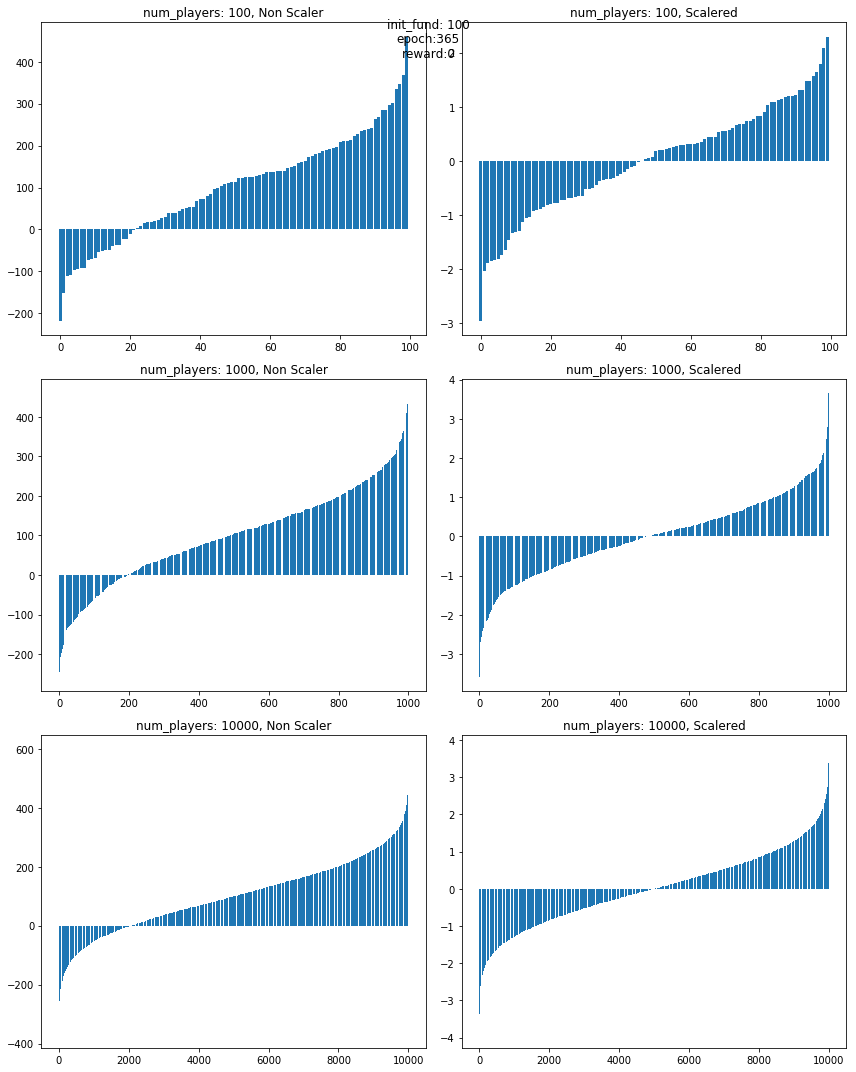

In [3]:
init_fund = 100
epoch = 365 * 40
reward = 0.0

num_players_list = [100,1000,10000]

fig, ax = plt.subplots(3, 2, figsize = (12,15))
fig.suptitle("init_fund: 100\nepoch:365\nreward:0")

for idx , num_players in zip(product([0,1,2],[0,1]), sorted(num_players_list*2)):
    sorted_fund, sorted_scaler_fund = roulette_game(num_players, init_fund, epoch, reward)
    if idx[1] == 0:
        ax[idx[0],idx[1]].bar(range(num_players), sorted_fund)
        ax[idx[0],idx[1]].set_title("num_players: {}, Non Scaler".format(num_players))
    if idx[1] == 1:
        ax[idx[0],idx[1]].bar(range(num_players), sorted_scaler_fund)
        ax[idx[0],idx[1]].set_title("num_players: {}, Scalered".format(num_players))
    
fig.tight_layout()
plt.savefig('不同数量参与者下的分布.png')
plt.show()


## 只改变每个人的初始金额

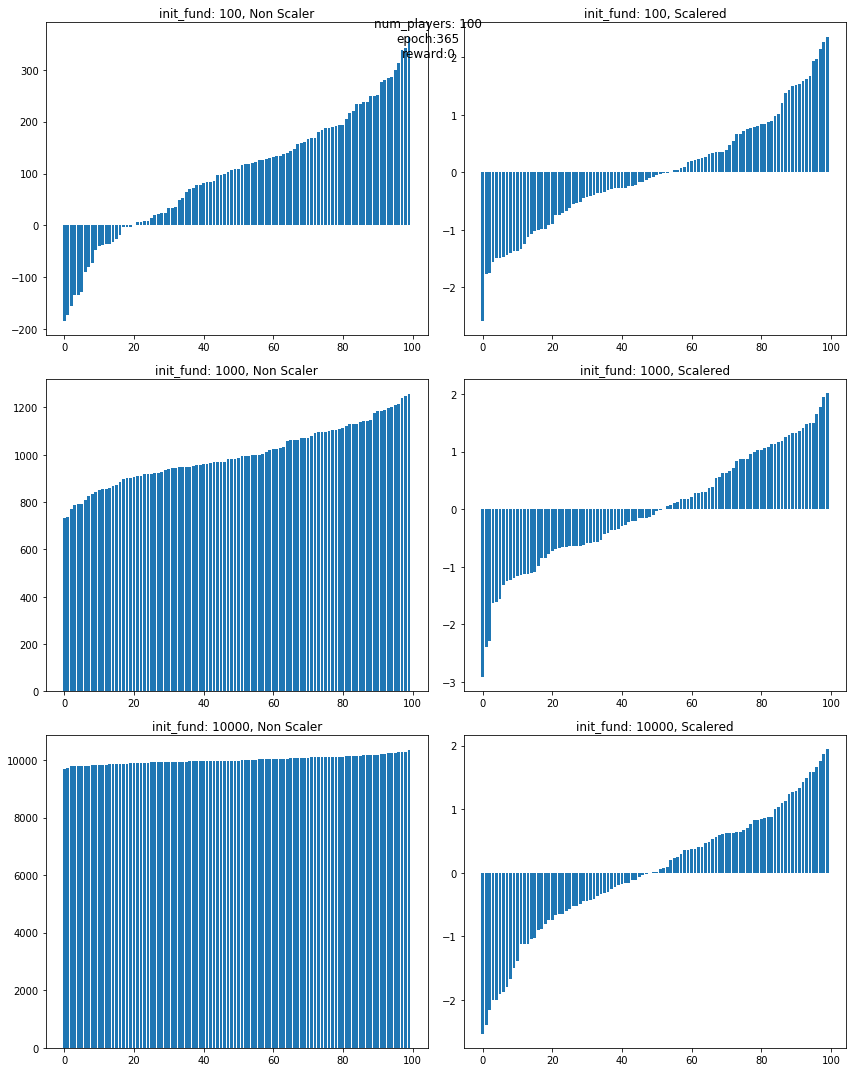

In [4]:
num_players = 100
epoch = 365 * 40
reward = 0.0

init_fund_list = [100,1000,10000]

fig, ax = plt.subplots(3, 2, figsize = (12,15))
fig.suptitle("num_players: 100\nepoch:365\nreward:0")

for idx , init_fund in zip(product([0,1,2],[0,1]), sorted(init_fund_list*2)):
    sorted_fund, sorted_scaler_fund = roulette_game(num_players, init_fund, epoch, reward)
    if idx[1] == 0:
        ax[idx[0],idx[1]].bar(range(num_players), sorted_fund)
        ax[idx[0],idx[1]].set_title("init_fund: {}, Non Scaler".format(init_fund))
    if idx[1] == 1:
        ax[idx[0],idx[1]].bar(range(num_players), sorted_scaler_fund)
        ax[idx[0],idx[1]].set_title("init_fund: {}, Scalered".format(init_fund))
    
fig.tight_layout()
plt.savefig('不同初始金额下的分布.png')
plt.show()


## 只改变游戏盘数

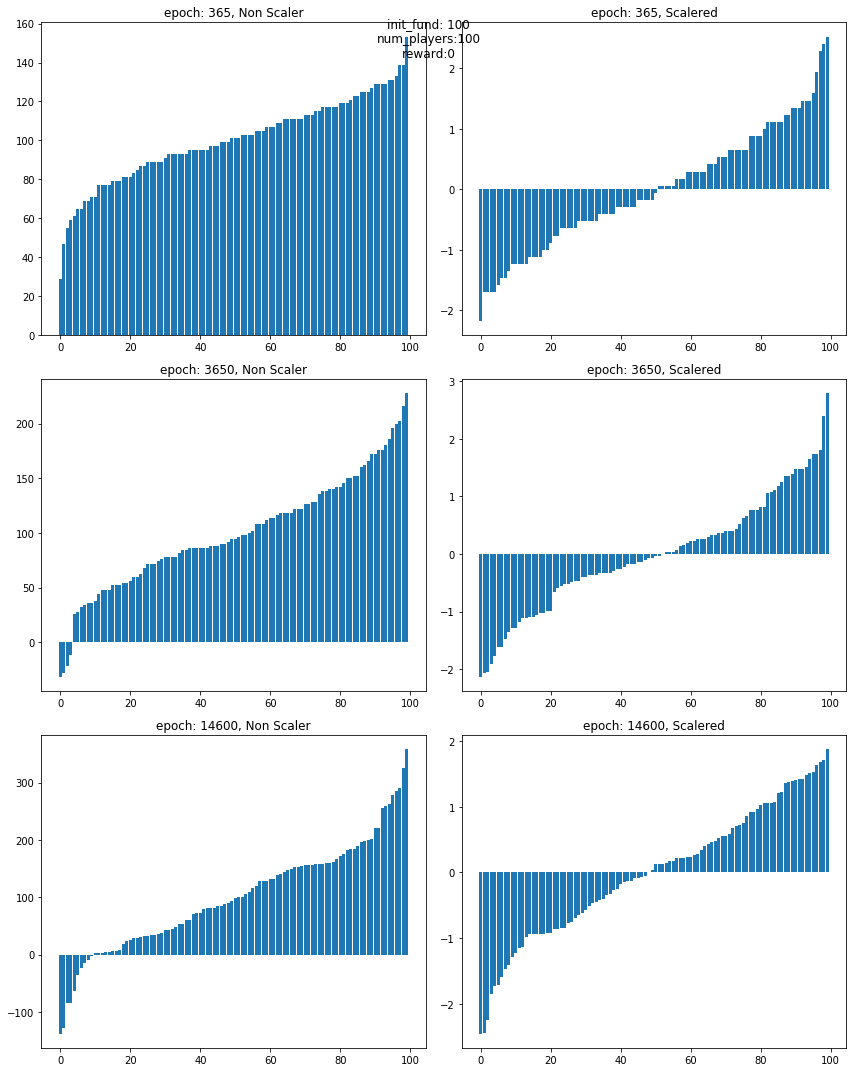

In [5]:
num_players = 100
init_fund = 100
reward = 0.0

epoch_list = [365, 365 * 10 ,365 * 40]

fig, ax = plt.subplots(3, 2, figsize = (12,15))
fig.suptitle("init_fund: 100\nnum_players:100\nreward:0")

for idx , epoch in zip(product([0,1,2],[0,1]), sorted(epoch_list*2)):
    sorted_fund, sorted_scaler_fund = roulette_game(num_players, init_fund, epoch, reward)
    if idx[1] == 0:
        ax[idx[0],idx[1]].bar(range(num_players), sorted_fund)
        ax[idx[0],idx[1]].set_title("epoch: {}, Non Scaler".format(epoch))
    if idx[1] == 1:
        ax[idx[0],idx[1]].bar(range(num_players), sorted_scaler_fund)
        ax[idx[0],idx[1]].set_title("epoch: {}, Scalered".format(epoch))
    
fig.tight_layout()
plt.savefig('不同轮转次数下的分布.png')
plt.show()


## 每盘游戏中的赢家可以额外一部分奖金，并改变奖金的大小

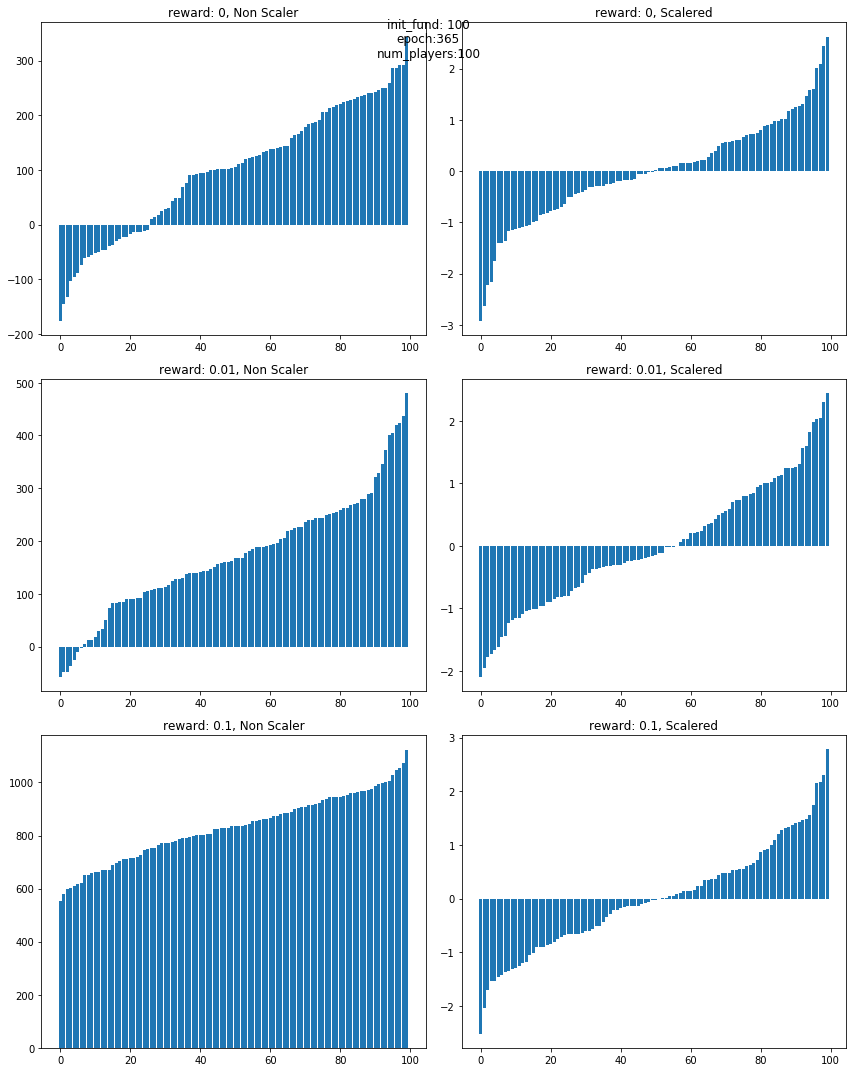

In [6]:
def roulette_game(num_players, init_fund, epoch, reward):
    fund = np.ones(num_players) * init_fund
    ## 一下为轮盘游戏
    for i in range(epoch):
        roulette = np.random.random(num_players)
        roulette_sort_ind = np.argsort(roulette)
        fund[roulette_sort_ind[:int(num_players/2)]] -= 1
        fund[roulette_sort_ind[int(num_players/2):]] += 1 
        fund[roulette_sort_ind[int(num_players/2):]] += reward
    sorted_fund = sorted(fund)

    ## 将游戏结果 标准化
    std = np.std(fund)
    scaler_fund = (fund - np.mean(fund)) / std 
    sorted_scaler_fund = sorted(scaler_fund)
    return sorted_fund, sorted_scaler_fund
    

num_players = 100
init_fund = 100
epoch = 365 * 40

reward_list = [0,0.01, 0.1]

fig, ax = plt.subplots(3, 2, figsize = (12,15))
fig.suptitle("init_fund: 100\nepoch:365\nnum_players:100")

for idx , reward in zip(product([0,1,2],[0,1]), sorted(reward_list*2)):
    sorted_fund, sorted_scaler_fund = roulette_game(num_players, init_fund, epoch, reward)
    if idx[1] == 0:
        ax[idx[0],idx[1]].bar(range(num_players), sorted_fund)
        ax[idx[0],idx[1]].set_title("reward: {}, Non Scaler".format(reward))
    if idx[1] == 1:
        ax[idx[0],idx[1]].bar(range(num_players), sorted_scaler_fund)
        ax[idx[0],idx[1]].set_title("reward: {}, Scalered".format(reward))
    
fig.tight_layout()
plt.savefig('赢家在不同额外收益下的分布.png')
plt.show()


## 每场游戏中，输家付出1元外，但能得到游戏管理员的补贴reward。而赢家除了得到1元外，不获得补贴。

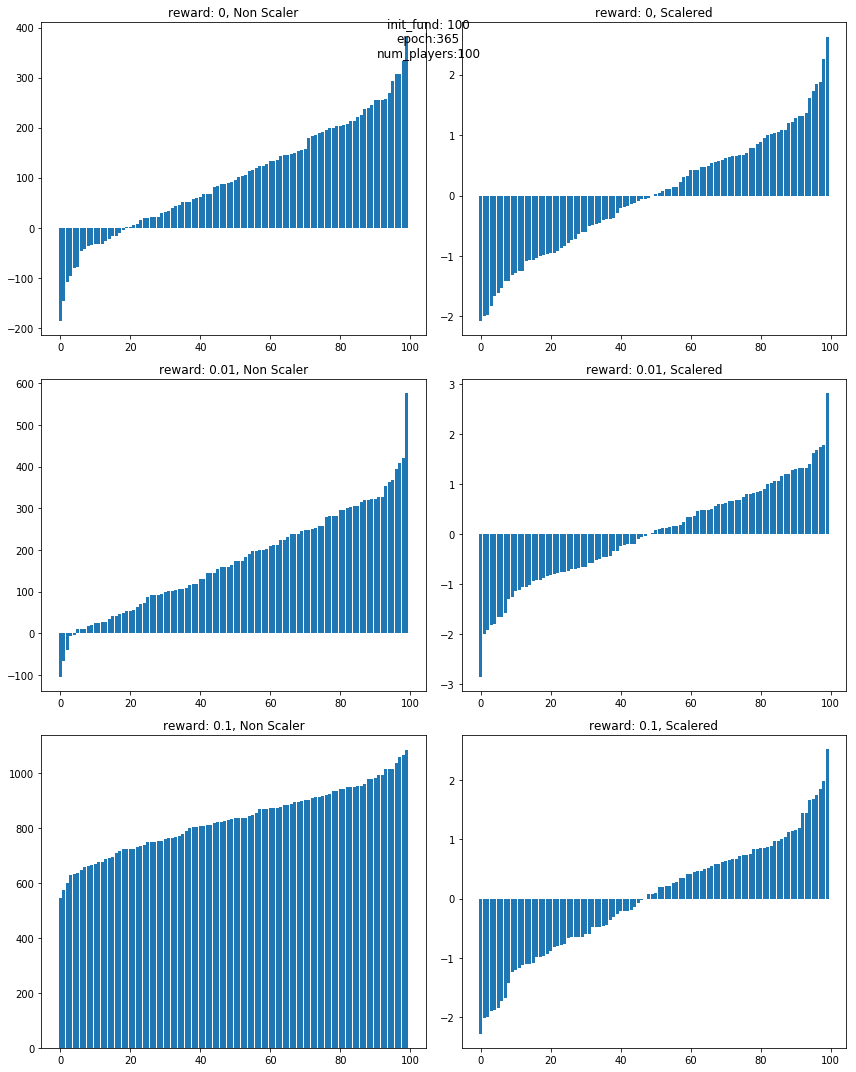

In [7]:
def roulette_game(num_players, init_fund, epoch, reward):
    fund = np.ones(num_players) * init_fund
    ## 以下为轮盘游戏
    for i in range(epoch):
        roulette = np.random.random(num_players)
        roulette_sort_ind = np.argsort(roulette)
        fund[roulette_sort_ind[:int(num_players/2)]] -= 1
        fund[roulette_sort_ind[int(num_players/2):]] += 1 
        fund[roulette_sort_ind[:int(num_players/2)]] += reward
    sorted_fund = sorted(fund)

    ## 将游戏结果 标准化
    std = np.std(fund)
    scaler_fund = (fund - np.mean(fund)) / std 
    sorted_scaler_fund = sorted(scaler_fund)
    return sorted_fund, sorted_scaler_fund
    
num_players = 100
init_fund = 100
epoch = 365 * 40

reward_list = [0,0.01, 0.1]

fig, ax = plt.subplots(3, 2, figsize = (12,15))
fig.suptitle("init_fund: 100\nepoch:365\nnum_players:100")

for idx , reward in zip(product([0,1,2],[0,1]), sorted(reward_list*2)):
    sorted_fund, sorted_scaler_fund = roulette_game(num_players, init_fund, epoch, reward)
    if idx[1] == 0:
        ax[idx[0],idx[1]].bar(range(num_players), sorted_fund)
        ax[idx[0],idx[1]].set_title("reward: {}, Non Scaler".format(reward))
    if idx[1] == 1:
        ax[idx[0],idx[1]].bar(range(num_players), sorted_scaler_fund)
        ax[idx[0],idx[1]].set_title("reward: {}, Scalered".format(reward))
    
fig.tight_layout()
plt.savefig('输家在不同额外收益下的分布.png')
plt.show()


## 假设n个参与者中，有10%是特别的努力，他们相对于其他人多了1%的竞争优势，从数据上来看，就是他们的游戏胜率增加1%

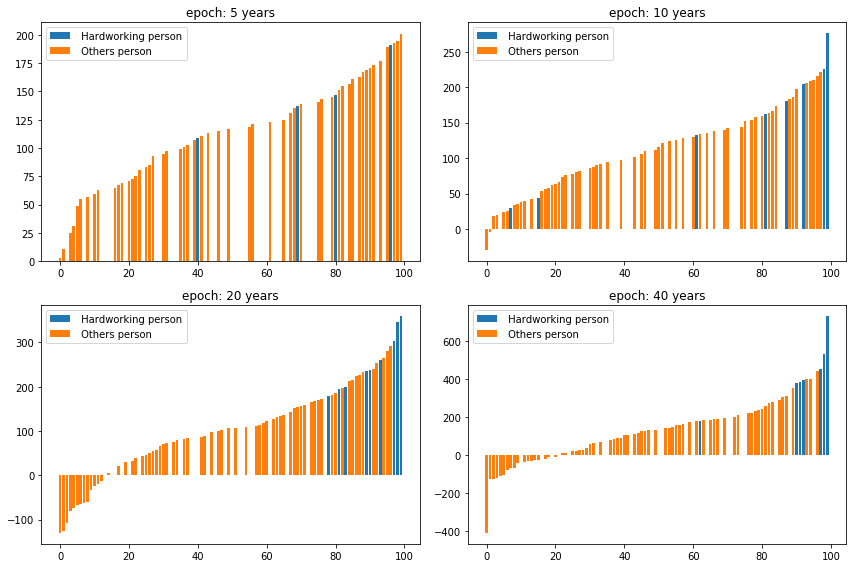

In [8]:
def roulette_game(num_players, init_fund, epoch):
    fund = np.ones(num_players) * init_fund
    lucky_fund = fund[:int(num_players * 0.1)]
    others_fund = fund[int(num_players * 0.1):]
    
    ## 以下为轮盘游戏
    for i in range(epoch):
        luck_roulette = np.random.random(int(num_players * 0.1))
        others_roulette = np.random.random(int(num_players * 0.9))
        
        lucky_fund[luck_roulette < 0.51] += 1
        lucky_fund[luck_roulette >= 0.51] -= 1
        others_fund[others_roulette < 0.5] += 1
        others_fund[others_roulette >= 0.5] -= 1
        
    fund = np.array(list(lucky_fund) + list( others_fund))
    sorted_fund = sorted(fund)
    lucky_ind = [list(sorted_fund).index(x) for x in lucky_fund]
    others_ind = [list(sorted_fund).index(x) for x in others_fund]
        
    return lucky_fund, others_fund ,lucky_ind ,others_ind
    
    
epoch_list = [365*x for x in [5,10,20, 40]]
num_players = 100
init_fund = 100

fig, ax = plt.subplots(2, 2, figsize = (12,8))
for idx , epoch in zip(product([0,1],[0,1]), sorted(epoch_list)):
    lucky_fund, others_fund ,lucky_ind ,others_ind = roulette_game(num_players, init_fund, epoch)
    ax[idx[0],idx[1]].bar(lucky_ind, lucky_fund , label = ' Hardworking person')
    ax[idx[0],idx[1]].bar(others_ind, others_fund , label = ' Others person')
    ax[idx[0],idx[1]].set_title("epoch: {} years".format(int(epoch / 365)))
    ax[idx[0],idx[1]].legend()

fig.tight_layout()
plt.savefig("10%的人特别努力并比其他人高1%的赢率.png")
plt.show()

## 奋斗增加 rate %的获胜概率 vs 出身拥有资本为普通人的multiple倍

In [9]:
def roulette_game(num_players, init_fund, epoch , rate, multiple):
    lucky_fund = np.ones( int(num_players * 0.1)) * init_fund
    richer_fund = np.ones( int(num_players * 0.1)) * init_fund * multiple
    others_fund = np.ones( int(num_players * 0.8)) * init_fund
    
    ## 以下为轮盘游戏
    for i in range(epoch):
        luck_roulette = np.random.random(int(num_players * 0.1))
        rich_roulette = np.random.random(int(num_players * 0.1))
        others_roulette = np.random.random(int(num_players * 0.8))
        
        lucky_fund[luck_roulette < (0.5 + rate)] += 1
        lucky_fund[luck_roulette >= (0.51 + rate)] -= 1
        others_fund[others_roulette < 0.5] += 1
        others_fund[others_roulette >= 0.5] -= 1
        richer_fund[rich_roulette < 0.5] += 1
        richer_fund[rich_roulette >= 0.5] -= 1
        
    fund = np.array(list(lucky_fund) + list( others_fund) + list(richer_fund))
    sorted_fund = sorted(fund)
    lucky_ind = [list(sorted_fund).index(x) for x in lucky_fund]
    richer_ind = [list(sorted_fund).index(x) for x in richer_fund]
    others_ind = [list(sorted_fund).index(x) for x in others_fund]
        
    return lucky_fund, richer_fund, others_fund ,lucky_ind ,richer_ind, others_ind

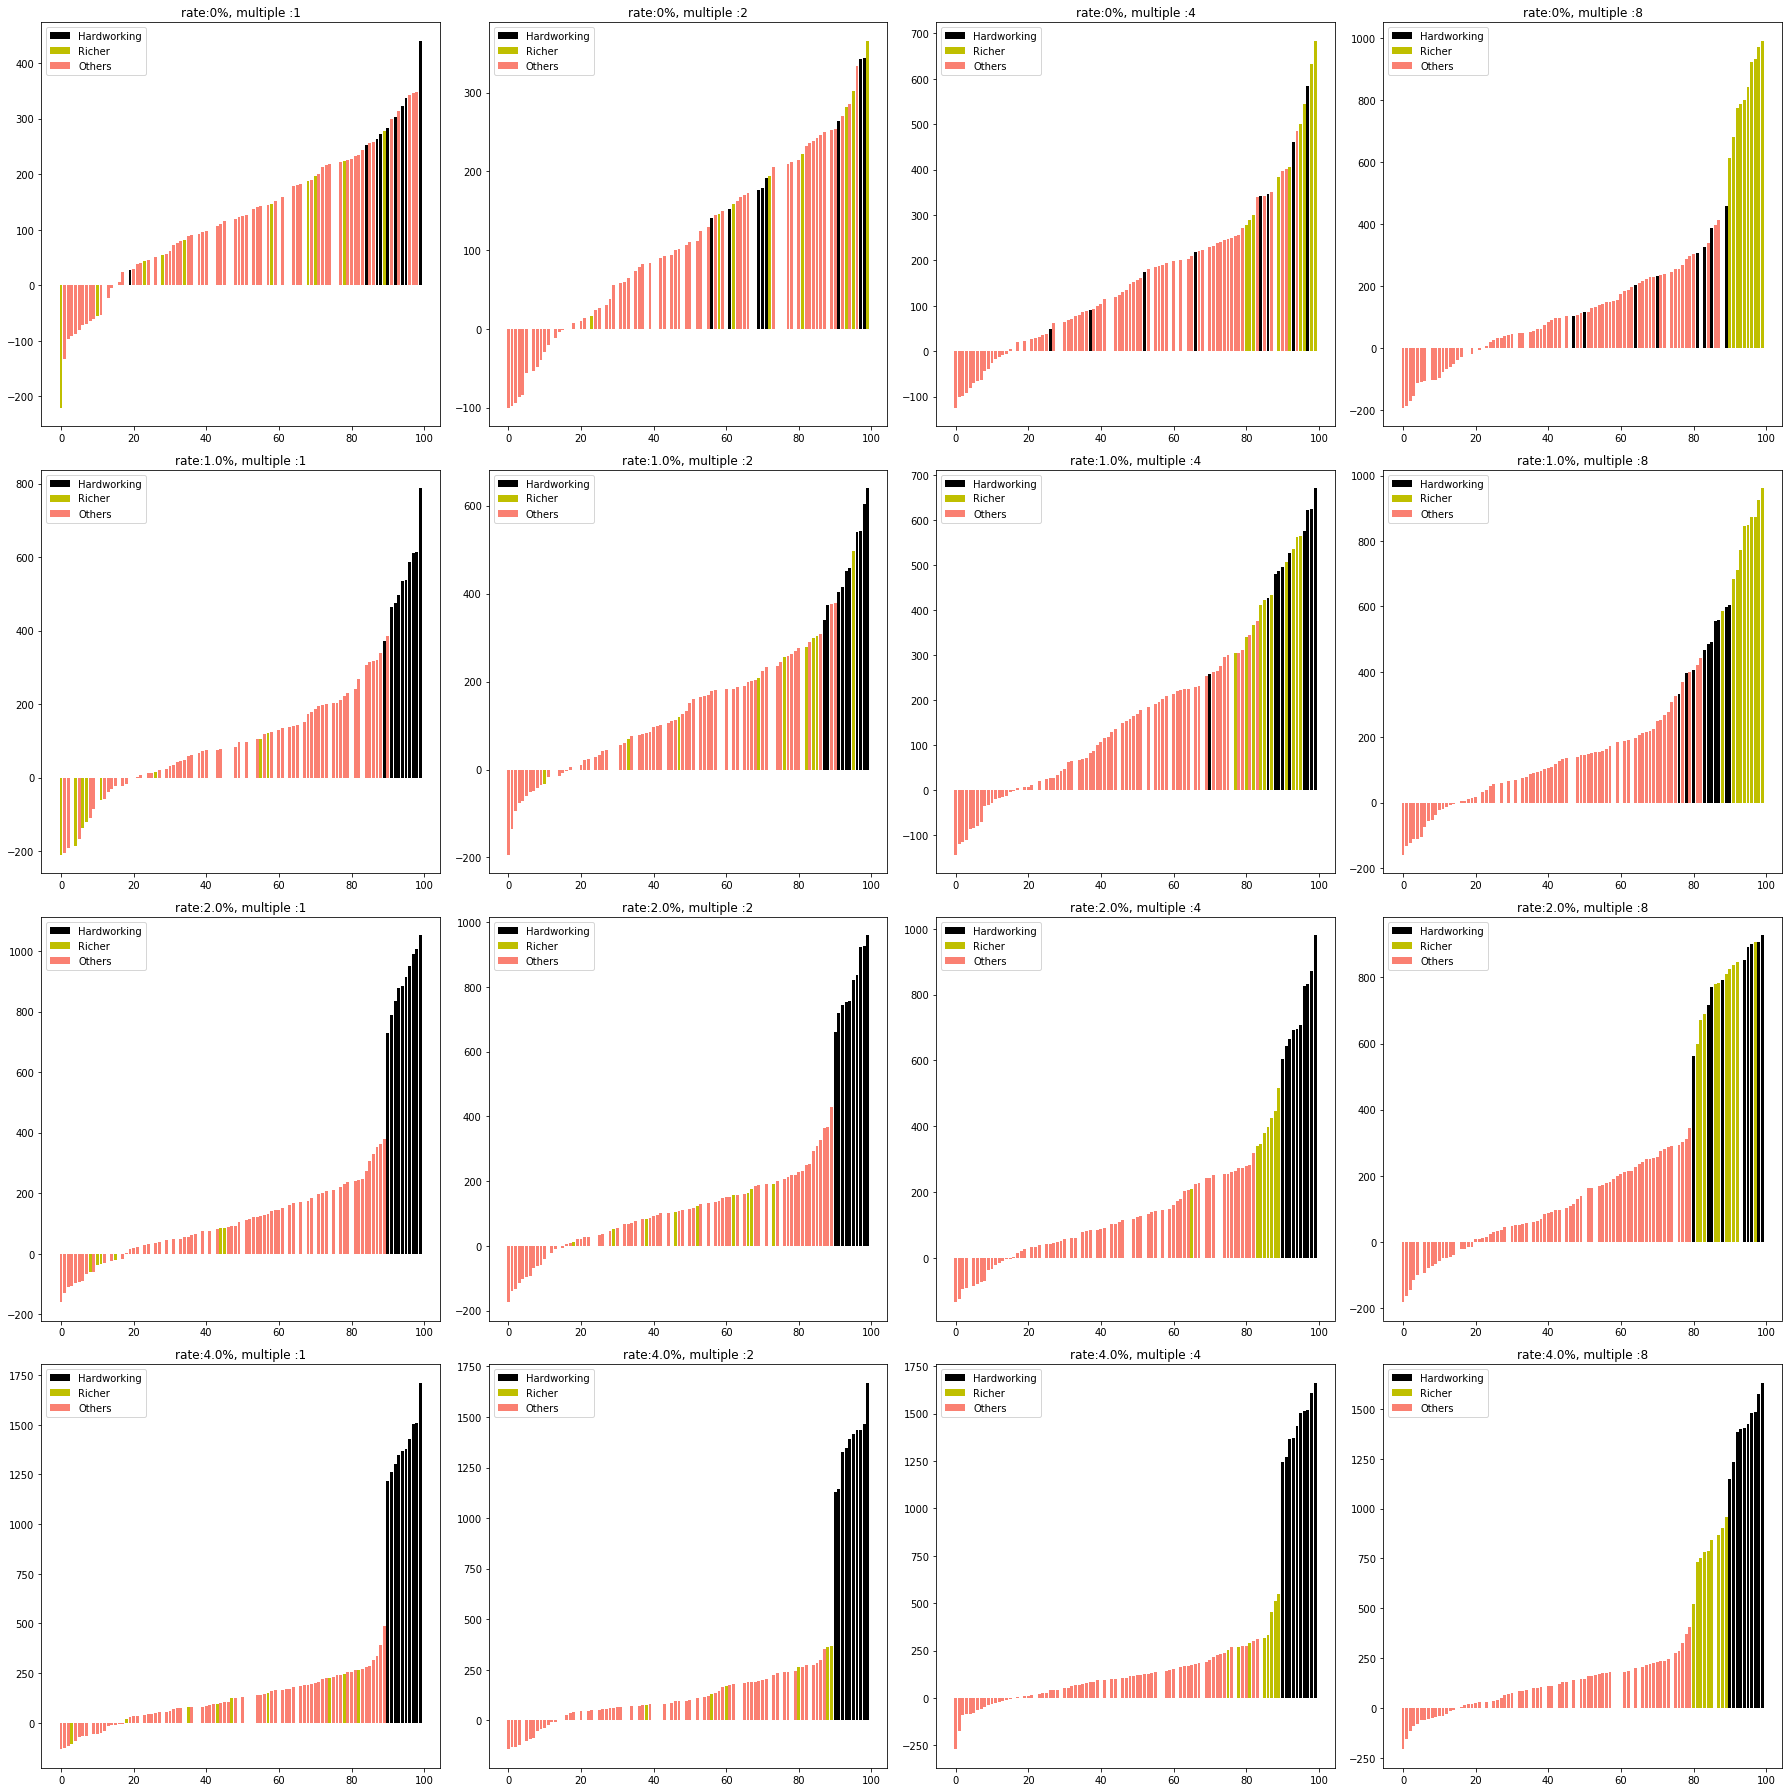

In [10]:
num_players = 100
init_fund = 100
epoch = 40 * 365 
rate_list = [0, 0.01, 0.02, 0.04]
multiple_list = [1,2, 4, 8] 

fig, ax = plt.subplots(4, 4, figsize = (25,25))

for idx in product([0,1,2,3],[0,1,2,3]):
    rate = rate_list[idx[0]]
    multiple = multiple_list[idx[1]]
    lucky_fund, richer_fund, others_fund ,lucky_ind ,richer_ind, others_ind = roulette_game(num_players,
                                                                                        init_fund, epoch , 
                                                                                        rate, multiple)  
    ax[idx[0], idx[1]].bar(lucky_ind, lucky_fund , label = 'Hardworking', color = "black" )
    ax[idx[0], idx[1]].bar(richer_ind, richer_fund, label = "Richer", color = "y" )
    ax[idx[0], idx[1]].bar(others_ind, others_fund , label = "Others", color = "salmon")
    ax[idx[0], idx[1]].legend()
    ax[idx[0], idx[1]].set_title("rate:{}%, multiple :{}".format(rate * 100,multiple ))
    
fig.tight_layout()
plt.savefig("奋斗增加rate%的获胜概率vs出身拥有资本为普通人的multiple倍.png")
plt.show()
    